# Pandas Introduction

## Reading files into DataFrames

In Pandas, data is accessed through a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe). A DataFrame is a 2D data structure where each column may contain different data types, from numeric series to complex structures. In most cases, you can think on DataFrames as _tables_.

The [IO API](https://pandas.pydata.org/pandas-docs/stable/io.html) has different methods to read different formats, most common one is text-delimited files:

In [1]:
import pandas as pd
data = pd.read_csv("./data/goog.csv")

From this point we can access the data using different methods. For instance, `head(n)` will retrieve the first `n` columns:

In [2]:
data.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,692.200012,700.650024,692.130005,699.210022,1342700,699.210022
1,2016-06-30,685.469971,692.320007,683.650024,692.099976,1590500,692.099976


DataFrame also allows _range_ expressions, by using `[]` or `loc`.

In [3]:
data[5:7]

,Date,Open,High,Low,Close,Volume,Adj Close
5,2016-06-24,675.169983,689.400024,673.450012,675.219971,4399800,675.219971
6,2016-06-23,697.450012,701.950012,687.000000,701.869995,2157400,701.869995


In [4]:
data.loc[5:7]

,Date,Open,High,Low,Close,Volume,Adj Close
5,2016-06-24,675.169983,689.400024,673.450012,675.219971,4399800,675.219971
6,2016-06-23,697.450012,701.950012,687.000000,701.869995,2157400,701.869995
7,2016-06-22,699.059998,700.859985,693.081970,697.460022,1179300,697.460022


Single row access is done using `iloc` attribute:

In [5]:
data.iloc[5]

Date         2016-06-24
Open         675.169983
High         689.400024
Low          673.450012
Close        675.219971
Volume          4399800
Adj Close    675.219971
Name: 5, dtype: object

In [6]:
data.iloc[5].Open

675.169983

All methods and attributes a DataFrame supports can be checked in the [API documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Note that althought Pandas support Python's index operator `[]`, the recommended way to access values or ranges is to use `loc` for labels and `iloc` for positions. There's more information about it in the [Indexing and selecting data](https://pandas.pydata.org/docs/user_guide/indexing.html) chapter of Pandas documentation.

### Data formats and compression

Pandas can read and write multiple data formats, using `read_X` and `to_X` methods. Parameters are described in the [IO API documentation](https://pandas.pydata.org/pandas-docs/stable/io.html).

One of the popular formats is [PyArrow](https://arrow.apache.org/docs/python/pandas.html), that has relatively good integration with Pandas. Normally, you will be interested to use a binary column-oriented format called [Feather](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#feather), created from the Arrow project.

In [7]:
data = pd.read_feather('./data/goog.feather')
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

Notice that the index was lost when saving the data. You may want to create it again by doing:

In [8]:
data_indexed = data.set_index('Date')
data_indexed.head(1)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,692.200012,700.650024,692.130005,699.210022,1342700,699.210022


You can also replace the index in-place, without creating a copy:

In [9]:
data.set_index('Date', inplace=True)
data.head(1)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,692.200012,700.650024,692.130005,699.210022,1342700,699.210022


Similarly, you can write Feather files using `to_feather` function. Remember to drop the index first:

In [10]:
data = pd.read_csv("./data/goog.csv", index_col=0)
data.reset_index().to_feather('data/goog.feather')

Pandas also accepts compressed files, for instance in `gzip` format:

In [11]:
data = pd.read_csv('./data/goog.csv.gz')
data.head(1)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,692.200012,700.650024,692.130005,699.210022,1342700,699.210022


Remember that you don't need anything fancy to compress files, just use shell tools:

```
$ gzip -9 data_file.csv
```

## Accessing Data

### Column Indexing

By default, `read_csv` will not assume any index in the data. In our case we have a _natural_ index in the first column, so we can read the file again to make sure it's incorporated in the DataFrame:

In [12]:
data = pd.read_csv("./data/goog.csv", index_col=0)
data.head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,692.200012,700.650024,692.130005,699.210022,1342700,699.210022
2016-06-30,685.469971,692.320007,683.650024,692.099976,1590500,692.099976


And then we can use range expressions to fetch _years_:

In [13]:
data["2016":"2015"].head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,769.500000,769.500000,758.340027,758.880005,1489600,758.880005
2015-12-30,776.599976,777.599976,766.900024,771.000000,1293300,771.000000


Or _month_ ranges:

In [14]:
data["2016-05":"2015-04"].head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-04-29,690.700012,697.619995,689.000000,693.01001,2484300,693.01001
2016-04-28,708.260010,714.169983,689.549988,691.02002,2851100,691.02002


Notice that the index is set as an string instead of a timestamp. This could produce weird results when getting date ranges from the DataFrame. If you want to parse the dates, you have to set the flag `parse_dates=True` when reading the file.

In [15]:
data = pd.read_csv("./data/goog.csv", index_col=0, parse_dates=True)
data.index[0]

Timestamp('2016-07-01 00:00:00')

Then, for accessing a particular range remember the to use the `.loc` function instead of the array accessor:

In [16]:
data.loc['2016'].head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,692.200012,700.650024,692.130005,699.210022,1342700,699.210022
2016-06-30,685.469971,692.320007,683.650024,692.099976,1590500,692.099976


There's also a method called `.query` that would allow us to perform queries over the data:

In [17]:
data.query('Close > 600 & Volume > 33000000')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2007-11-08,734.60125,734.891274,677.181165,693.841184,33148100,346.574018


### Adding or removing columns

In [18]:
data["Diff"] = data.Close - data.Open
data[["Open", "Close", "Diff"]].head(2)

,Open,Close,Diff
Date,,,
2016-07-01,692.200012,699.210022,7.010010
2016-06-30,685.469971,692.099976,6.630005


In [19]:
del data["Diff"]
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

### Renaming a Column

In [20]:
data.rename(columns={'Adj Close': 'adj_close'})

,Open,High,Low,Close,Volume,adj_close
Date,,,,,,
2016-07-01,692.200012,700.650024,692.130005,699.210022,1342700,699.210022
2016-06-30,685.469971,692.320007,683.650024,692.099976,1590500,692.099976
2016-06-29,683.000000,687.429016,681.409973,684.109985,1928500,684.109985
2016-06-28,678.969971,680.330017,673.000000,680.039978,2116600,680.039978
2016-06-27,671.000000,672.299988,663.283997,668.260010,2629000,668.260010
...,...,...,...,...,...,...
2004-08-25,104.960181,108.000187,103.880180,106.000184,9232100,52.947145
2004-08-24,111.240189,111.600192,103.570177,104.870176,15319700,52.382705
2004-08-23,110.750191,113.480193,109.050183,109.400185,18342800,54.645447


### Parsing Dates

You would normally use `parse_dates=True` or `parse_dates=[0]` to automatically process dates when reading files. In some cases you would like to perform that manually by using `pd.to_datetime` function:

In [21]:
df2 = pd.read_csv("./data/goog.csv")
df2['Month'] = pd.to_datetime(df2['Date']).dt.month
df2.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,Month
0,2016-07-01,692.200012,700.650024,692.130005,699.210022,1342700,699.210022,7
1,2016-06-30,685.469971,692.320007,683.650024,692.099976,1590500,692.099976,6


### Grouping

In [22]:
df2.groupby(df2['Month'])['Close'].mean()

Month
1     583.353097
2     572.136671
3     557.874017
4     527.056556
5     531.708374
6     531.205082
7     538.988607
8     519.061782
9     505.104736
10    540.488037
11    565.204085
12    576.999005
Name: Close, dtype: float64

### Multi-Indexes

Pandas is able to treat data that has indexes in multiple levels. For instance, the `prices.csv` data set has two initial columns with the stock symbol and the date of the prices. That's described in [Hierarchical indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) documentation.

In [23]:
pd.read_csv('./data/prices.csv').head(2)

,Symbol,Date,Adj Close,Close,High,Low,Open,Volume
0,aapl,2010-01-04,6.535084,7.643214,7.660714,7.585,7.622500,493729600.0
1,msft,2010-01-04,23.800220,30.950001,31.100000,30.590,30.620001,38409100.0


We can easily tell Pandas that first two columns are the index by using the `index_col` parameter. Let's create a data frame named `prices`, containing price data for several stocks in a time range.

In [24]:
prices = pd.read_csv('./data/prices.csv', index_col=[0,1])
prices.head(5)

,,Adj Close,Close,High,Low,Open,Volume
Symbol,Date,,,,,,
aapl,2010-01-04,6.535084,7.643214,7.660714,7.585000,7.622500,4.937296e+08
msft,2010-01-04,23.800220,30.950001,31.100000,30.590000,30.620001,3.840910e+07
goog,2010-01-04,312.204773,312.204773,313.579620,310.954468,312.304413,3.927065e+06
^GSPC,2010-01-04,1132.989990,1132.989990,1133.869995,1116.560059,1116.560059,3.991400e+09
aapl,2010-01-05,6.546383,7.656429,7.699643,7.616071,7.664286,6.019048e+08


In [25]:
prices.index

MultiIndex([( 'aapl', '2010-01-04'),
            ( 'msft', '2010-01-04'),
            ( 'goog', '2010-01-04'),
            ('^GSPC', '2010-01-04'),
            ( 'aapl', '2010-01-05'),
            ( 'msft', '2010-01-05'),
            ( 'goog', '2010-01-05'),
            ('^GSPC', '2010-01-05'),
            ( 'aapl', '2010-01-06'),
            ( 'msft', '2010-01-06'),
            ...
            ( 'aapl', '2022-06-30'),
            ( 'msft', '2022-06-30'),
            ( 'goog', '2022-06-30'),
            ( 'tsla', '2022-06-30'),
            ('^GSPC', '2022-06-30'),
            ( 'aapl', '2022-07-01'),
            ( 'msft', '2022-07-01'),
            ( 'goog', '2022-07-01'),
            ( 'tsla', '2022-07-01'),
            ('^GSPC', '2022-07-01')],
           names=['Symbol', 'Date'], length=15608)

To query for a particular index, you can use `get_level_values` function and `isin`:

In [26]:
msft = prices[prices.index.get_level_values('Symbol').isin(['msft'])]
msft.head()

Adj Close      Close       High        Low       Open  \
Symbol Date                                                                
msft   2010-01-04  23.800220  30.950001  31.100000  30.590000  30.620001   
       2010-01-05  23.807911  30.959999  31.100000  30.639999  30.850000   
       2010-01-06  23.661804  30.770000  31.080000  30.520000  30.879999   
       2010-01-07  23.415728  30.450001  30.700001  30.190001  30.629999   
       2010-01-08  23.577215  30.660000  30.879999  30.240000  30.280001   

                       Volume  
Symbol Date                    
msft   2010-01-04  38409100.0  
       2010-01-05  49749600.0  
       2010-01-06  58182400.0  
       2010-01-07  50559700.0  
       2010-01-08  51197400.0

Also, `query` method is also available for multi-indexes:

In [27]:
prices.query('Symbol == "msft"').head()

Adj Close      Close       High        Low       Open  \
Symbol Date                                                                
msft   2010-01-04  23.800220  30.950001  31.100000  30.590000  30.620001   
       2010-01-05  23.807911  30.959999  31.100000  30.639999  30.850000   
       2010-01-06  23.661804  30.770000  31.080000  30.520000  30.879999   
       2010-01-07  23.415728  30.450001  30.700001  30.190001  30.629999   
       2010-01-08  23.577215  30.660000  30.879999  30.240000  30.280001   

                       Volume  
Symbol Date                    
msft   2010-01-04  38409100.0  
       2010-01-05  49749600.0  
       2010-01-06  58182400.0  
       2010-01-07  50559700.0  
       2010-01-08  51197400.0

Once filtering is done, you might want to drop `Symbol` index:

In [28]:
msft.index = msft.index.droplevel(0)
msft.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,23.800220,30.950001,31.100000,30.590000,30.620001,38409100.0
2010-01-05,23.807911,30.959999,31.100000,30.639999,30.850000,49749600.0
2010-01-06,23.661804,30.770000,31.080000,30.520000,30.879999,58182400.0
2010-01-07,23.415728,30.450001,30.700001,30.190001,30.629999,50559700.0
2010-01-08,23.577215,30.660000,30.879999,30.240000,30.280001,51197400.0


In [29]:
aapl = prices[prices.index.get_level_values('Symbol').isin(['aapl'])]
aapl.index = aapl.index.droplevel(0)
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.535084,7.643214,7.660714,7.585000,7.622500,493729600.0
2010-01-05,6.546383,7.656429,7.699643,7.616071,7.664286,601904800.0
2010-01-06,6.442255,7.534643,7.686786,7.526786,7.656429,552160000.0
2010-01-07,6.430345,7.520714,7.571429,7.466071,7.562500,477131200.0
2010-01-08,6.473095,7.570714,7.571429,7.466429,7.510714,447610800.0


All that operations can be simplified by using `loc` function

In [30]:
prices.loc['aapl'].head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.535084,7.643214,7.660714,7.585000,7.622500,493729600.0
2010-01-05,6.546383,7.656429,7.699643,7.616071,7.664286,601904800.0
2010-01-06,6.442255,7.534643,7.686786,7.526786,7.656429,552160000.0
2010-01-07,6.430345,7.520714,7.571429,7.466071,7.562500,477131200.0
2010-01-08,6.473095,7.570714,7.571429,7.466429,7.510714,447610800.0


### Stacking

Using `stack` and `unstack` you can easily convert multi-indexed data into different columns. Notice that in the following example, we're using column `1` as the first one in the index.

In [31]:
prices = pd.read_csv('./data/prices.csv', index_col=[1,0], usecols=[0,1,3], parse_dates=[1])
prices.head(5)

Close
Date       Symbol             
2010-01-04 aapl       7.643214
           msft      30.950001
           goog     312.204773
           ^GSPC   1132.989990
2010-01-05 aapl       7.656429

In [32]:
prices.unstack().head(2)

Close                                      
Symbol           ^GSPC      aapl        goog       msft tsla
Date                                                        
2010-01-04  1132.98999  7.643214  312.204773  30.950001  NaN
2010-01-05  1136.52002  7.656429  310.829926  30.959999  NaN

We recommend to read the Pandas documentation about [pivoting data](https://pandas.pydata.org/docs/user_guide/reshaping.html#pivot-tables).

## Series

All columns in the previous DataFrame are defined as [_Series_](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). A Serie is a data bag indexed by date, in most cases.

In [33]:
data.Close[:2]

Date
2016-07-01    699.210022
2016-06-30    692.099976
Name: Close, dtype: float64

In [34]:
type(data)

pandas.core.frame.DataFrame

In [35]:
type(data.Close)

pandas.core.series.Series

[Series API](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) has multiple methods, but one of the most interesting ones is the `describe` one:

In [36]:
data.Close.describe()

count    2989.000000
mean      545.555584
std       196.002935
min       100.010169
25%       435.110754
50%       537.359985
75%       625.651065
max      1220.172036
Name: Close, dtype: float64

### Sampling

In [37]:
data.Close.sample(n=3)

Date
2011-04-20    525.730893
2013-07-03    886.431543
2010-06-02    493.370861
Name: Close, dtype: float64

There are two interesting parameters to separate training data from model testing data:
- Use `frac` to get the % of items from the whole set to retrieve
- If you want sets to be consistent between runs, use `random_state`.

In [38]:
data.Close.sample(frac=0.003, random_state=1)

Date
2009-12-17    593.941045
2005-04-21    204.220356
2014-12-24    528.772422
2010-03-03    545.320926
2007-02-07    470.010792
2012-01-27    579.980993
2014-09-30    577.362590
2013-01-17    711.321223
2008-07-08    554.530932
Name: Close, dtype: float64

There are also two functions to retrieve the largest and smallest values of a set:

In [39]:
data.Close.nlargest(3)

Date
2014-02-26    1220.172036
2014-02-25    1220.002089
2014-03-06    1219.612082
Name: Close, dtype: float64

### Querying

In [40]:
data[data.Close > 1220]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-02-26,1224.002141,1228.882066,1213.762102,1220.172036,3979100,609.476541
2014-02-25,1215.942121,1224.502055,1210.422109,1220.002089,2888100,609.391653


In [41]:
data.query("Close > 1220")

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-02-26,1224.002141,1228.882066,1213.762102,1220.172036,3979100,609.476541
2014-02-25,1215.942121,1224.502055,1210.422109,1220.002089,2888100,609.391653


### Masking 

There's also two functions, `mask` and `where`, that you can use to discard or include values. In this case it's being is used to filter out values greater than 685, and fill the values with -42. If fill value is omited, `NaN` is used instead.

In [42]:
data.Close.where(lambda x: x > 685, -42).head(5)

Date
2016-07-01    699.210022
2016-06-30    692.099976
2016-06-29    -42.000000
2016-06-28    -42.000000
2016-06-27    -42.000000
Name: Close, dtype: float64

 Notice that `mask` and `where` do the opposite:

In [43]:
data.Close.mask(lambda x: x > 685, -42).head(5)

Date
2016-07-01    -42.000000
2016-06-30    -42.000000
2016-06-29    684.109985
2016-06-28    680.039978
2016-06-27    668.260010
Name: Close, dtype: float64

### Pipes

Is it possible to apply a function to every value of the Series:

In [44]:
def double(x):
    return x * 2

data.Close.pipe(double).pipe(lambda x: x + 5).head(2)

Date
2016-07-01    1403.420044
2016-06-30    1389.199952
Name: Close, dtype: float64

The `pipe` operation can be also applied to DataFrames:

In [45]:
def double_close(df):
    df['Double Close'] = df['Close'] * 2
    return df

data.pipe(double_close).head(2)

,Open,High,Low,Close,Volume,Adj Close,Double Close
Date,,,,,,,
2016-07-01,692.200012,700.650024,692.130005,699.210022,1342700,699.210022,1398.420044
2016-06-30,685.469971,692.320007,683.650024,692.099976,1590500,692.099976,1384.199952


### Apply

The `apply` method allows to execute arbitrary functions over a Series.

In [46]:
data.Close['2016'].apply(lambda x: x * 2)

Date
2016-07-01    1398.420044
2016-06-30    1384.199952
2016-06-29    1368.219970
2016-06-28    1360.079956
2016-06-27    1336.520020
                 ...     
2016-01-08    1428.939942
2016-01-07    1452.780030
2016-01-06    1487.239990
2016-01-05    1485.160034
2016-01-04    1483.680054
Name: Close, Length: 126, dtype: float64

It can also be applied to a DataFrame directly, by selecting the axis - normally `0` for the index and `1` for the DataFrame columns.

In [47]:
import numpy as np
data.apply(np.mean, axis=0)

Open            5.458180e+02
High            5.510774e+02
Low             5.399927e+02
Close           5.455556e+02
Volume          8.722729e+06
Adj Close       3.310623e+02
Double Close    1.091111e+03
dtype: float64

In [48]:
data.apply(np.mean, axis=1)

Date
2016-07-01    1.925117e+05
2016-06-30    2.279043e+05
2016-06-29    2.761840e+05
2016-06-28    3.030504e+05
2016-06-27    3.762399e+05
                  ...     
2004-08-25    1.318970e+06
2004-08-24    2.188628e+06
2004-08-23    2.620502e+06
2004-08-20    3.277641e+06
2004-08-19    6.410279e+06
Length: 2989, dtype: float64

### Reading directly into a series

Instead of reading files as `DataFrames`, it's possible to read a `Series` directly, using column 0 as date, and colum 4 as the `Series` value. Do not forget to apply the `.squeze` function afterwards.

In [49]:
series = pd.read_csv("./data/goog.csv", header=0, index_col=0, usecols=[0, 4], parse_dates=True).squeeze()
series.head()

Date
2016-07-01    699.210022
2016-06-30    692.099976
2016-06-29    684.109985
2016-06-28    680.039978
2016-06-27    668.260010
Name: Close, dtype: float64

---

### Exercise 1.1

Read file `prices.mp` and filter symbol `tsla`. Select 90% of `Close` column for training and reserve 10% for model later checking. Try to randomise data picked.

You may want to check [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/).

### Exercise 1.2

From `prices.csv` file, read `msft` data and write it as a Feather file in `data/msft.feather`.

### Exercise 1.3

Add a boolean column to previous `msft` data frame indicating if trades open with values greater than 100.

### Exercise 1.4

Look in Pandas documentation for __styling functions__ and mark in red the `close` values below 30.

---

## Time-Series

Our series can be [resampled](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) to months, using mean close price for each one.

- M: Months
- Q: Quarters
- A: Years

The `resample` function just returns an object represeting the resampling. We have to pick one of the many functions to extract the value for each new of the rows generated (months, quarters or year rows). The available offset strings can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

In [50]:
series = pd.read_csv("./data/goog.csv", header=0, index_col=0, usecols=[0, 4], parse_dates=True).squeeze()
series.resample("A")

### Padding

First thing we can do is to get the latest value known in each range, using `fillna` with `ffill` method. Don't use `pad` function, since it's deprecated.

In [51]:
series['2004-12-31']

192.790325

In [52]:
series.resample("A").fillna(method="ffill").head()

Date
2004-12-31    192.790325
2005-12-31    414.860723
2006-12-31    460.480804
2007-12-31    691.481171
2008-12-31    307.650529
Freq: A-DEC, Name: Close, dtype: float64

For brevity, there's a function called `ffill` that calls to `fillna` internally:

In [53]:
series.resample("A").ffill().head()

Date
2004-12-31    192.790325
2005-12-31    414.860723
2006-12-31    460.480804
2007-12-31    691.481171
2008-12-31    307.650529
Freq: A-DEC, Name: Close, dtype: float64

### Computing range mean, min or max values

And we can also get the mean values for each range. Instead of `fillna`, use `mean` function:

In [54]:
series["2004"].mean()

151.80153629787233

In [55]:
series.resample("A").mean().head()

Date
2004-12-31    151.801536
2005-12-31    277.759564
2006-12-31    411.186004
2007-12-31    538.751362
2008-12-31    464.852813
Freq: A-DEC, Name: Close, dtype: float64

In [56]:
series.resample("A").max().head()

Date
2004-12-31    197.600333
2005-12-31    432.040752
2006-12-31    509.650860
2007-12-31    741.791259
2008-12-31    685.331181
Freq: A-DEC, Name: Close, dtype: float64

Or even `sum` all the values in a range - although in this case it doesn't make too much sense.

In [57]:
series.resample("A").sum().head()

Date
2004-12-31     14269.344412
2005-12-31     69995.410151
2006-12-31    103207.687074
2007-12-31    135226.591787
2008-12-31    117607.761661
Freq: A-DEC, Name: Close, dtype: float64

### Ploting resampled series for better understanding

In [58]:
series.head()

Date
2016-07-01    699.210022
2016-06-30    692.099976
2016-06-29    684.109985
2016-06-28    680.039978
2016-06-27    668.260010
Name: Close, dtype: float64

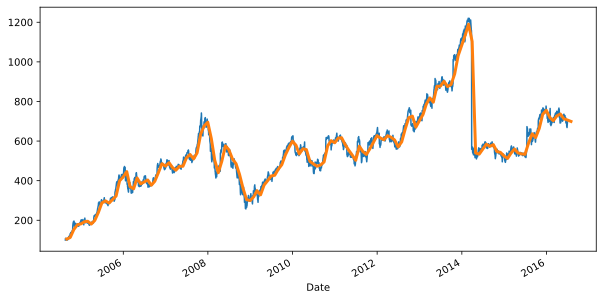

In [59]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
series.plot(figsize=(10,5))
series.resample("M").mean().plot(linewidth=3)
plt.show()

### OHLC: Open, High, Low, Close

A very interesting function is `ohlc`, that computes several values for a date range.

In [60]:
series.resample("A").ohlc()

,open,high,low,close
Date,,,,
2004-12-31,100.340176,197.600333,100.010169,192.790325
2005-12-31,202.710351,432.040752,174.990304,414.860723
2006-12-31,435.230740,509.650860,337.060574,460.480804
2007-12-31,467.590802,741.791259,438.680763,691.481171
2008-12-31,685.191192,685.331181,257.440455,307.650529
2009-12-31,321.320557,622.871087,282.750497,619.981079
2010-12-31,626.751061,626.771094,436.070761,593.971003
2011-12-31,604.351030,645.901096,474.880824,645.901096
2012-12-31,665.411118,768.051291,559.050931,707.381210


### Custom ranges

Every two years:

In [61]:
series.resample("2A").mean().head()

Date
2004-12-31    151.801536
2006-12-31    344.340154
2008-12-31    501.655463
2010-12-31    487.656550
2012-12-31    605.749265
Freq: 2A-DEC, Name: Close, dtype: float64

There is more information for those magic strings like `2A` in [the documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

### Upsampling

Apart of grouping data (or _downsampling_) we can also calculate interpolated values. For instence, we're going to calculate values for each quarter, using `"Q"` or `"4M"` parameters.

First we need to get the data downsampled to year values, using latest one.

In [62]:
msft_year = series.resample("A").mean()
msft_year

Date
2004-12-31    151.801536
2005-12-31    277.759564
2006-12-31    411.186004
2007-12-31    538.751362
2008-12-31    464.852813
2009-12-31    439.689088
2010-12-31    535.624013
2011-12-31    568.975142
2012-12-31    642.817582
2013-12-31    884.244254
2014-12-31    696.317865
2015-12-31    602.462102
2016-12-31    717.235795
Freq: A-DEC, Name: Close, dtype: float64

Then we can interpolate some values. Normally you would use `ffill`, optionally setting the maximum number of rows to fill before stopping propagation and filling with `NaN`.

In [63]:
rs = msft_year.resample("Q")
max_propagated = 2
pd.DataFrame({ 'mean': rs.mean(), 'ffill': rs.ffill(), 
              'ffill_max': rs.ffill(max_propagated) })[:9]

,mean,ffill,ffill_max
Date,,,
2004-12-31,151.801536,151.801536,151.801536
2005-03-31,NaN,151.801536,151.801536
2005-06-30,NaN,151.801536,151.801536
2005-09-30,NaN,151.801536,NaN
2005-12-31,277.759564,277.759564,277.759564
2006-03-31,NaN,277.759564,277.759564
2006-06-30,NaN,277.759564,277.759564
2006-09-30,NaN,277.759564,NaN
2006-12-31,411.186004,411.186004,411.186004


---

### Exercise 1.5

Read CSV data for Tesla `tsla` directly into a `Series` and compute _closing_ values for each quarter.

---

## Cookbook


### Combining Series into new DataFrame

In [64]:
msft_aapl = pd.DataFrame({ 'msft': msft.Close, 'aapl': aapl.Close })
msft_aapl[:3]

,msft,aapl
Date,,
2010-01-04,30.950001,7.643214
2010-01-05,30.959999,7.656429
2010-01-06,30.770000,7.534643


By default it uses closed ranges.

### Column projections

In [65]:
from sample_data import stock_prices
aapl = stock_prices('aapl')

In [66]:
aapl.loc[:,"Year"] = pd.to_datetime(aapl.index).map(lambda d: d.year)
aapl[:2]

,Adj Close,Close,High,Low,Open,Volume,Year
Date,,,,,,,
2010-01-04,6.535084,7.643214,7.660714,7.585000,7.622500,493729600.0,2010
2010-01-05,6.546383,7.656429,7.699643,7.616071,7.664286,601904800.0,2010


### Using custom indexes

In [67]:
dates = pd.date_range('2015-10', '2016-02', freq='M')
dates

DatetimeIndex(['2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31'], dtype='datetime64[ns]', freq='M')

In [68]:
from pandas import Series
Series(series, index=dates)

2015-10-31           NaN
2015-11-30    742.599976
2015-12-31    758.880005
2016-01-31           NaN
Freq: M, Name: Close, dtype: float64

### Install packages in Colab Notebooks

Very simple, use `pip` or `conda`, by appending a `!` in a cell for executing in a shell

`!pip install package_name`.